Universidad Nacional Abierta y a Distancia UNAD 

Análisis de datos 
Presentado por: Jhon Alexánder Hincapié Zambrano 
Grupo: 202016908_71
area 5 - Proyecto Análisis de datos Titanic

Regresión logística. Pasos de la actividad:

Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características. Dividir el dataset en Train y Test para evaluar correctamente el modelo. Entrenar el modelo configurando los diferentes hiperparámetros. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo. Interpretar, analizar y documentar los resultados obtenidos. •Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/

In [1]:
#1 - Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
#Crear librerías
import pandas as pd #Manejo y análisis de estructuras de datos
import numpy as np #Cálculo numérico y el análisis de datos
import seaborn as sns #Creación gráficos estadísticos
import matplotlib.pyplot as plt #Creación de gráficos en dos dimenciones
%matplotlib inline
import scipy as sc

#Librerías para implementar modelos de ciencia de datos

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.preprocessing import LabelEncoder

In [2]:
Datos = pd.read_csv('./Titanic-Dataset.csv', encoding='latin1')

In [3]:
#Realizamos la lectura de los datos para el análisis exploratorio
Datos.head(60)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Analisis exploratorio:

En el dataset de Titanic las variables disponibles son:

PassengerId: identificador único del pasajero.

Survived: si el pasajero sobrevivió al naufragio, codificada como 0 (no) y 1 (si). Esta es la variable respuesta que interesa predecir.

Pclass: clase a la que pertenecía el pasajero: 1, 2 o 3.

Name: nombre del pasajero.

Sex: sexo del pasajero.

Age: edad del pasajero.

SibSp: número de hermanos, hermanas, hermanastros o hermanastras en el barco.

Parch: número de padres e hijos en el barco.

Ticket: identificador del billete.

Fare: precio pagado por el billete.

Cabin: identificador del camarote asignado al pasajero.

Embarked: puerto en el que embarcó el pasajero.

In [4]:
pd.options.display.float_format = '{:,.2f}'.format
print(Datos.shape)

(891, 12)


In [5]:
Datos.describe(include='all').fillna('-')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.00,891.00,891.00,891,891,714.00,891.00,891.00,891,891.00,204,889
unique,-,-,-,891,2,-,-,-,681,-,147,3
top,-,-,-,"Braund, Mr. Owen Harris",male,-,-,-,347082,-,B96 B98,S
freq,-,-,-,1,577,-,-,-,7,-,4,644
mean,446.00,0.38,2.31,-,-,29.70,0.52,0.38,-,32.20,-,-
std,257.35,0.49,0.84,-,-,14.53,1.10,0.81,-,49.69,-,-
min,1.00,0.00,1.00,-,-,0.42,0.00,0.00,-,0.00,-,-
25%,223.50,0.00,2.00,-,-,20.12,0.00,0.00,-,7.91,-,-
50%,446.00,0.00,3.00,-,-,28.00,0.00,0.00,-,14.45,-,-
75%,668.50,1.00,3.00,-,-,38.00,1.00,0.00,-,31.00,-,-


Podemos observar que la edad promedio es de 29 años pero hay que tener en cuenta que hay datos faltantes, tambien podemos observar que el precio del ticket promedio era de 32.20, el precio mas alto 512 y tambien hubieron viajes gratis o cortesias, Sibsp y Parch nos da la información para saber con cuanta familia venia el sujeto, podemos ver que la mayoria viaja solo.

Podemos observar que hubo mas muertos que sobrevivientes.

Columna Survive: Vamos a analizar nuestra columna mas importante, ya que es el resultado que queremos predecir en nuestro modelo

¿Cuantas personas sobrevivieron y cuantas murieron?

In [6]:
Datos.groupby(['Survived'])['Survived'].count()

Survived
0    549
1    342
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

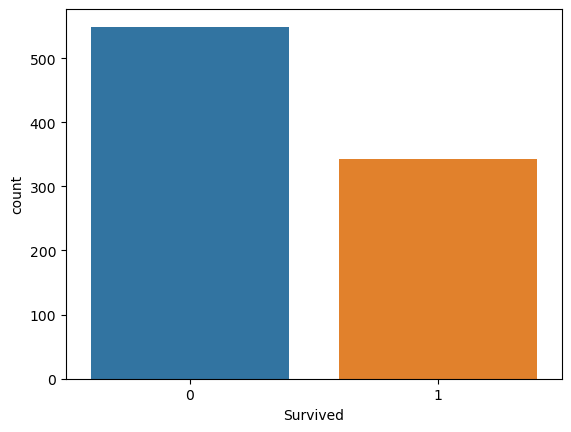

In [7]:
sns.countplot(x=Datos['Survived'])

¿Cuantos hombres y mujeres sobrevivieron?

In [8]:
Datos.groupby(['Survived', 'Sex'])['Sex'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Sex, dtype: int64

AttributeError: 'numpy.int64' object has no attribute 'startswith'

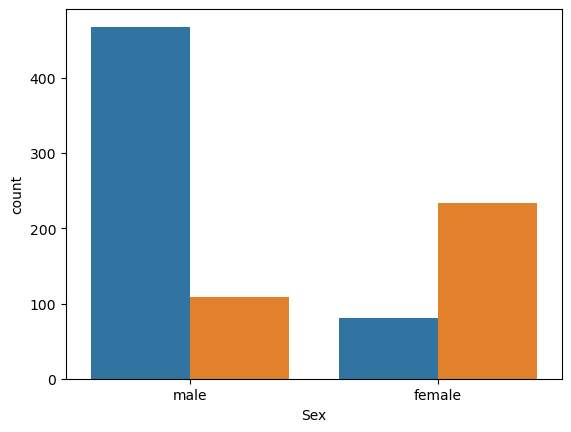

In [9]:
sns.countplot(data=Datos, x='Sex', hue='Survived')

¿De qué clase sobrevieron más personas?

In [ ]:
Datos.groupby('Pclass')['Pclass'].count()

In [ ]:
ticket_class = Datos.groupby(['Survived', 'Pclass'])['Survived'].count()
print(ticket_class)
print(ticket_class.groupby(level=0).apply(lambda x: x/ x.sum() *100))
print(ticket_class.groupby(level=1).apply(lambda x: x/ x.sum() *100))

In [ ]:
sns.countplot(data=Datos, x='Survived', hue='Pclass')

¿Que edad promedio tienen las personas de cada clase que sobrevivieron?

In [10]:
Datos.groupby(['Survived', 'Pclass'])['Age'].mean()
Datos.groupby(['Survived', 'Pclass'])['Age'].mean().groupby(level=1).apply(lambda x: np.mean(x))

Pclass
1   39.53
2   29.72
3   23.60
Name: Age, dtype: float64

<Axes: xlabel='Pclass', ylabel='Age'>

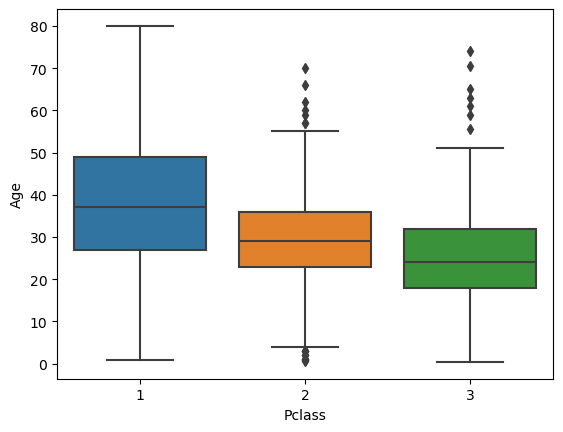

In [11]:
sns.boxplot(x=Datos['Pclass'], y=Datos['Age'])

¿Existe alguna relación entre el lugar donde embarcaron y la posibilidad de sobrevivir?

In [12]:
Datos.groupby(['Survived', 'Embarked'])['Survived'].count()

Survived  Embarked
0         C            75
          Q            47
          S           427
1         C            93
          Q            30
          S           217
Name: Survived, dtype: int64

AttributeError: 'numpy.int64' object has no attribute 'startswith'

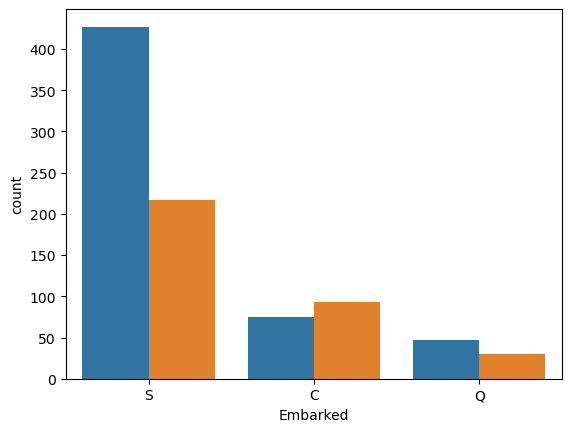

In [13]:
sns.countplot(data=Datos, x='Embarked', hue='Survived')

¿Existe una relación entre el costo del ticket y la posibilidad de sobrevivir?

In [14]:
pd.cut(Datos['Fare'], bins= 3).value_counts()

Fare
(-0.512, 170.776]     871
(170.776, 341.553]     17
(341.553, 512.329]      3
Name: count, dtype: int64

In [15]:
Datos['Cost'] = pd.cut(Datos['Fare'], bins= [-1,171,342,513])
Datos['Cost'] = pd.cut(Datos['Fare'], bins= [-1,171,342,513])
Datos['Cost'].sample(5)

343    (-1, 171]
837    (-1, 171]
457    (-1, 171]
501    (-1, 171]
309    (-1, 171]
Name: Cost, dtype: category
Categories (3, interval[int64, right]): [(-1, 171] < (171, 342] < (342, 513]]

C:\Users\Pc\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Pc\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


AttributeError: 'numpy.int64' object has no attribute 'startswith'

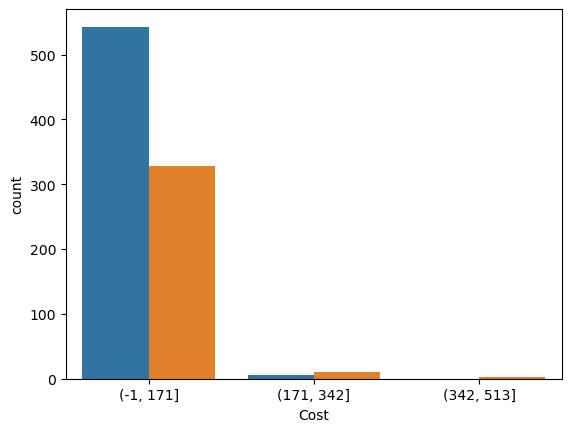

In [16]:
sns.countplot(data=Datos, x='Cost', hue='Survived')

In [17]:
Datos.groupby(['Survived', 'Cost'])['Survived'].count()

C:\Users\Pc\AppData\Local\Temp\ipykernel_6188\365872851.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Datos.groupby(['Survived', 'Cost'])['Survived'].count()


Survived  Cost      
0         (-1, 171]     543
          (171, 342]      6
          (342, 513]      0
1         (-1, 171]     328
          (171, 342]     11
          (342, 513]      3
Name: Survived, dtype: int64

Conclusión:

Sobrevivieron el 38% (342) personas de las 891 que se tiene registro que iban a bordo, la mayoría de los sobrevivientes eran mujeres, la edad promedio de los sobrevivientes era de 28 años, la tercera Clase fue donde hubo mas mutes..n

In [18]:
#Limpieza de Datos:
Datos.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Cost             0
dtype: int64

Tenemos 2 columnas con datos faltantes, una de ellas tiene mas del 70% de los datos faltantes, debido a que hay demasiados datos faltantes y no tenemos manera de llenar los datos, la otra columna es muy importante ya que la edad influye mucho en la capacidad de supervivencia

Para tratar estos datos perdidos de esta columna vamos a aplicar el metodo de imputación, en este caso vamos a crear una funcion que dependiendo si se salvo o murio y en que clase iba vamos añadir la edad promedio

C:\Users\Pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


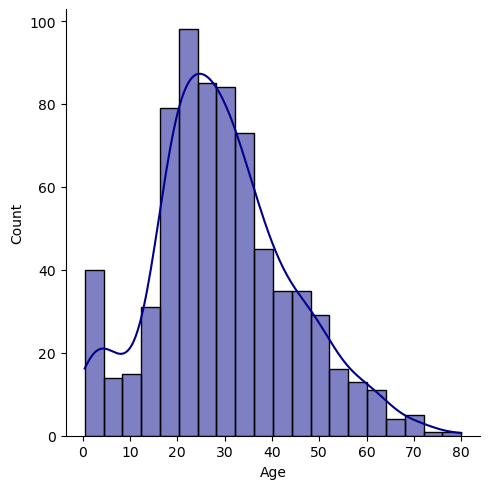

In [19]:
sns.displot(Datos['Age'].dropna(), kde=True, color='darkblue')

In [20]:
Datos.groupby('Pclass')['Age'].mean()

Pclass
1   38.23
2   29.88
3   25.14
Name: Age, dtype: float64

In [21]:
class_age = {
    1:38,
    2:29,
    3:25
}

In [22]:
def fill_age(columns):
    age = columns[0]
    pclass = np.int64(columns[1])
    return class_age[pclass] if pd.isnull(age) else age

In [23]:
Datos['Age'] = Datos[['Age', 'Pclass']].apply(fill_age, axis=1)
Datos['Age'] = Datos[['Age', 'Pclass']].apply(fill_age, axis=1)
Datos.isnull().sum()

C:\Users\Pc\AppData\Local\Temp\ipykernel_6188\3399512612.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age = columns[0]
C:\Users\Pc\AppData\Local\Temp\ipykernel_6188\3399512612.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pclass = np.int64(columns[1])
C:\Users\Pc\AppData\Local\Temp\ipykernel_6188\3399512612.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age = columns[0]
C:\Users\Pc\AppData\Local\Temp\ipykernel_6188

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Cost             0
dtype: int64

La variable cabina no la considero relevante para el análisis del dataset así que será eliminada:

In [24]:
if 'Cabin' in Datos.columns:
    Datos = Datos.drop(columns='Cabin')
else:
    print("La columna 'Cabin' no existe en el DataFrame.")

In [25]:
print(Datos.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Cost'],
      dtype='object')


Data wrangling

Hacemos que los datos sean digestibles para nuestro modelo, vamos a cambiar el tipo de variables a las adecuadas, vamos a elegir las columnas que vamos a ocupar en nuestro modelo

In [26]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     889 non-null    object  
 11  Cost         891 non-null    category
dtypes: category(1), float64(2), int64(5), object(4)
memory usage: 77.7+ KB


Vamos a elegir los datos que preparamos ['Survived', 'Pclass', 'Sex', 'Age', 'Cost'] con estos datos vamos a entrenar nuestro modelo vamos a cambiar su dtype

In [27]:
Datos[['T_cheap', 'T_medium', 'T_expensive']] = pd.get_dummies(Datos['Cost'])
Datos[['T_cheap', 'T_medium', 'T_expensive']] = pd.get_dummies(Datos['Cost'])

In [28]:
Datos[['Survived', 'Pclass', 'Cost', 'Sex']] = Datos[['Survived', 'Pclass', 'Cost', 'Sex']].astype('category')
Datos[['Pclass', 'Cost', 'Sex']] = Datos[['Pclass', 'Cost', 'Sex']].astype('category')

In [29]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     889 non-null    object  
 11  Cost         891 non-null    category
 12  T_cheap      891 non-null    bool    
 13  T_medium     891 non-null    bool    
 14  T_expensive  891 non-null    bool    
dtypes: bool(3), category(4), float64(2), int64(3), object(3)
memory usage: 62.4+ KB


In [30]:
print(pd.get_dummies(Datos['Sex']))
Datos[['Female', 'Male']] = pd.get_dummies(Datos['Sex'])
Datos[['Female', 'Male']] = pd.get_dummies(Datos['Sex'])
Datos[['Female', 'Male']]

     female   male
0     False   True
1      True  False
2      True  False
3      True  False
4     False   True
..      ...    ...
886   False   True
887    True  False
888    True  False
889   False   True
890   False   True

[891 rows x 2 columns]


,Female,Male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [31]:
Datos['Sex'] = pd.get_dummies(Datos['Sex'], drop_first=True)

In [32]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    bool    
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     889 non-null    object  
 11  Cost         891 non-null    category
 12  T_cheap      891 non-null    bool    
 13  T_medium     891 non-null    bool    
 14  T_expensive  891 non-null    bool    
 15  Female       891 non-null    bool    
 16  Male         891 non-null    bool    
dtypes: bool(6), category(3), float64(2), int64(3), object(3)
memory usage: 64

In [33]:
print(pd.get_dummies(Datos['Sex']))

     False  True 
0    False   True
1     True  False
2     True  False
3     True  False
4    False   True
..     ...    ...
886  False   True
887   True  False
888   True  False
889  False   True
890  False   True

[891 rows x 2 columns]


In [34]:
Datos[['Female', 'Male']] = pd.get_dummies(Datos['Sex'])
Datos[['Female', 'Male']]

,Female,Male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [35]:
Datos[['Female', 'Male']] = pd.get_dummies(Datos['Sex'])

# Convertir de True/False a 1/0
Datos[['Female', 'Male']] = Datos[['Female', 'Male']].astype(int)

# Mostrar el resultado
print(Datos[['Female', 'Male']])

     Female  Male
0         0     1
1         1     0
2         1     0
3         1     0
4         0     1
..      ...   ...
886       0     1
887       1     0
888       1     0
889       0     1
890       0     1

[891 rows x 2 columns]


Entrenamiento del Modelo:

Debido a nuestra salida es 0 o 1 vamos a utilizar un modelo de regresion logistica para que sea más preciso que el de regresion lineal

In [36]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    bool    
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     889 non-null    object  
 11  Cost         891 non-null    category
 12  T_cheap      891 non-null    bool    
 13  T_medium     891 non-null    bool    
 14  T_expensive  891 non-null    bool    
 15  Female       891 non-null    int32   
 16  Male         891 non-null    int32   
dtypes: bool(4), category(3), float64(2), int32(2), int64(3), object(3)
memory

In [38]:
Datos = Datos[['Age', 'Pclass', 'Female', 'Male', 'T_cheap', 'T_medium', 'T_expensive', 'Survived']]

In [39]:
# Definir las características (features) y la variable objetivo (target)
feature_columns = ['Age', 'Pclass', 'Female', 'Male', 'T_cheap', 'T_medium', 'T_expensive']
X = Datos[feature_columns]
Y = Datos['Survived']

In [40]:
# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, Y_train)

logreg = LogisticRegression()
logreg.fit(X, Y)

LogisticRegression()

In [41]:
# Hacer predicciones
Y_pred = model.predict(X_test)

Axes(0.125,0.11;0.775x0.77)
0.8013468013468014


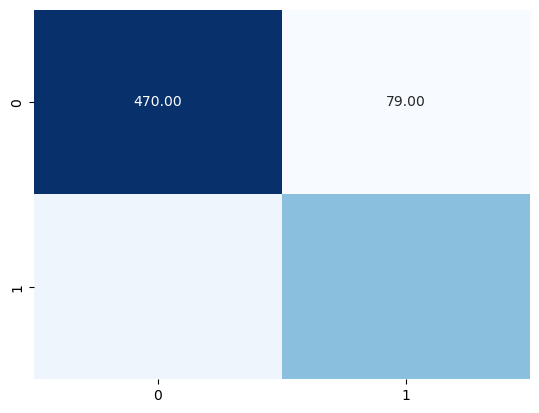

In [42]:
# Modelo de regresion logistica
Y_pred = logreg.predict(X)
cf_matrix = metrics.confusion_matrix(Y, Y_pred)
print(sns.heatmap(cf_matrix, annot=True, fmt='.2f', cmap='Blues', cbar=False))
print(metrics.accuracy_score(Y, Y_pred))

Axes(0.125,0.11;0.775x0.77)
0.8013468013468014


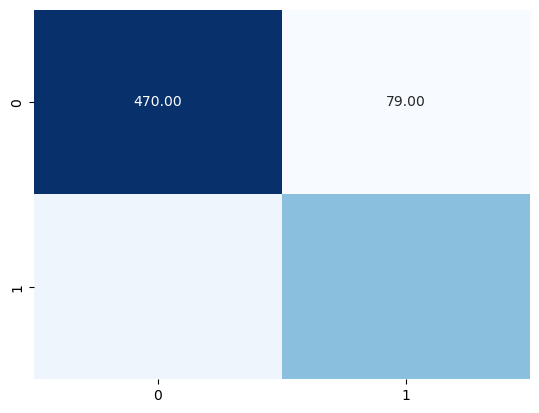

In [48]:
Y_pred = logreg.predict(X)
cf_matrix = metrics.confusion_matrix(Y, Y_pred)
print(sns.heatmap(cf_matrix, annot=True, fmt='.2f', cmap='Blues', cbar=False))
print(metrics.accuracy_score(Y, Y_pred))